<center><img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height:150px"></center>

<hr style="border-width:2px;border-color:red">
<center><h1>Test Technique Data Scientist</h1></center>
<center><h2> Mesure de la dérive </h2></center>
<hr style="border-width:2px;border-color:red">

# Contexte

La **dérive** en apprentissage automatique (ou **"drift"** en anglais) fait référence à un **changement dans les données d'entrée ou de sortie d'un modèle** de machine learning **après son entraînement initial**. Cela peut se produire lorsque les données utilisées pour entraîner le modèle ne **reflètent plus la réalité**, ou lorsque **les conditions du problème changent de manière significative**.

La dérive des données peut affecter la précision du modèle de manière significative et peut entraîner des erreurs coûteuses dans les prévisions ou les décisions basées sur le modèle. Par conséquent, **il est important de surveiller régulièrement les performances du modèle** et de le mettre à jour en fonction des nouveaux jeux de données ou des nouvelles conditions du problème.

# Objectif

Dans ce test, vous allez implémenter des métriques permettant de mesurer la dérive d'un modèle dans un usecase de **e-commerce** où nous essayons de prédire le **panier total** (variable **`TotalCart`** : chiffre d'affaire total d'un client sur la période donnée) des clients en fonction des variables suivantes:
* **`Age`** : âge du client en années.
* **`Seniority`** : ancienneté du client en années.
* **`Orders`** : Nombre de commandes effectuées sur la période précédente.
* **`Items`** : Nombre d'items commandés sur la période précédente.
* **`AverageDiscount`** : Réduction moyenne accordée au client sur la période précédente en pourcentage.
* **`TopCategory`** : Catégorie de produits favorite du client.
* **`BrowsingTime`** : Temps total passé sur le site web sur la période précédente en secondes.
* **`EmailsOpened`** : Nombre de mails marketing ouverts par le client sur la période précédente.
* **`SupportInteractions`** : Nombre d'interactions que le client a eu avec le service client sur la période précédente.

Le jeu de données est décomposé en 4 périodes correspondant aux 4 trimestres de l'année 2022. Vous trouverez les données correspondant à chaque période dans les fichiers **`period_0.csv`**, **`period_1.csv`**, ..., **`period_3.csv`**.

Vous allez d'abord **entraîner et évaluer un modèle de machine learning** sur les données de la **période 0**. On supposera que ce modèle sera utilisé pour effectuer les prédictions de panier total sur toute l'année 2022.

Ensuite, vous devrez **implémenter des métriques de dérive** qui vous seront données et **effectuer une analyse** de celle-ci.

# Entraînement du modèle

* **Entraînez et validez** deux ou trois modèles de votre choix sur les données de la période 0. 

**Conseils**

* Vous serez évalué sur votre **rigueur** et non sur les performances du modèle.


* Il n'est pas nécessaire de faire une analyse exploratoire des données.


* Il n'est pas nécessaire de faire de recherche d'hyperparamètres optimaux non plus mais vous pouvez le faire si vous le souhaitez.

# Exercice 1 : 

Dans cette partie, je vais **récupérer les données de la période 0** puis les diviser en **données d'entraînements en entrée/sortie** et **données de test en entrée/sortie**.

Ensuite, je me servirais de ces données pour entraîner et valider deux modèles :

* Un modèle basé sur la **régression linéaire multiple**.


* Un modèle en **arbre de décision**.

*Importation des librairies, classes et fonctions*.

In [34]:
import pandas as pd
import math
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt; plt.rcdefaults()

Récupération des données sous forme de pandas DataFrame

In [35]:
period_0 = pd.read_csv("period_0.csv")

**On découpe nos données initiales :**
* `x` : les variables explicatives; toutes les variables sauf la variable à prédire

* `y` : la variable à prédire; **`TotalCart`**

> *Remarque* : L'âge est souvent considéré comme une variable qualitative, néanmoins, je pense que plus une personne est âgée, plus elle a des dépenses importantes à faire. Donc je la considère comme quantitative.

In [36]:
y = period_0["TotalCart"]
x = period_0.drop(["TotalCart"],axis = 1)

Nous traitons un cas avec une variable qualitative; **TopCategory**, nous devons donc appliquer un algorithme d'encodage à chaud avant de poursuivre.

L'encodage à chaud se fera via la fonction **pd.get_dummies** et le nouveau data set sera stocké sur **x_dummies**.

In [37]:
x_dummies = pd.get_dummies(x)

**Division en données de formation et données d'évaluation** :

On utilise la fonction **train_test_split** de la librairie sklearn.model_selection afin de répartir nos données en données de formation et données d'évaluation.
* **x_train** : Données de formation en entrée
* **x_test**  : Données d'évaluation en entrée
* **y_train** : Données de formations en sortie
* **y_test**  : Données d'évaluations en sortie

80% des données seront utilisées pour **l'entrainement** du modèle et les 20% restants pour la **validation**

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_dummies, y, test_size = 0.2, random_state = 0)

### Régression linéaire multiple

A partir des données choisies nous allons créer un modèle de régression linéaire multiple. En effet, la régression linéaire est une manière efficace de prédire une variable quantitative continue.

**Mise en forme des données**

Nous allons **centrer et réduire** nos données pour optimiser l'algorithme de **régression**. 

In [39]:
scaler = StandardScaler()

x_train_rlm = scaler.fit_transform(x_train)
x_test_rlm  = scaler.transform(x_test)

On **crée et entraîne notre modèle** en utilisant les données de formation : 

In [40]:
model_rlm = LinearRegression()
model_rlm.fit(x_train_rlm, y_train)

LinearRegression()

On effectue nos **predictions** : 

In [41]:
y_pred_rlm = model_rlm.predict(x_test_rlm)

On **valide notre modèle** sur les **données d'évaluation** via la **Mean Squared Error** et la **Mean Absolute Error** : 

In [42]:
test_mse = mean_squared_error(y_test, y_pred_rlm)
test_mae = mean_absolute_error(y_test, y_pred_rlm)
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", math.sqrt(test_mse))

mse =  85.84491811332678  & mae =  4.566313010109085  & rmse =  9.265253267629912


On observe aussi le **coefficient de détermination** :

In [43]:
print(model_rlm.score(x_test_rlm, y_test)*100,'%')

70.00776508067652 %


On a une erreur **moyenne absolue d'environ 4.6** et un **coefficient de détermination à 70%**.

### Arbre de décision

Une autre manière efficace de prévoir une variable continue est via un **arbre de décision**. Ceux-ci présentent de nombreux avantages, nottament, on peut utiliser des variables qualitatives/quantatives sans avoir à modifier la donnée pour améliorer la performance, ce qui est avantageux en l'occurence.

On **crée et entraîne notre modèle** en utilisant les données de formation : 

In [44]:
model_dtg = DecisionTreeRegressor(max_depth=20)
model_dtg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=20)

On effectue les **prédictions** : 

In [45]:
y_pred_dtg = model_dtg.predict(x_test)

On **valide le modèle** : 

In [46]:
test_mse = mean_squared_error(y_test,y_pred_dtg)
test_mae = mean_absolute_error(y_test, y_pred_dtg)
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", math.sqrt(test_mse))

mse =  8.133225  & mae =  2.0898000000000003  & rmse =  2.8518809582449265


On a une **erreur absolue moyenne d'environ 2.2**.

* **Entrainez votre modèle sur toute la période 0** puis **testez votre modèle** sur les données des **périodes 1, 2 et 3**. Comment évolue la performance du modèle?

## Partie 2 : Entrainement d'un modèle sur toute la période 0

Dans cette partie nous nous contrerons sur un seul modèle, **l'Arbre de décision**, en effet c'est celui qui a montré les meilleurs résultats auparavants. 

Une autre raison de le choisir : **un arbre de décision est très sensible aux variations de la donnée**. Par conséquent l'analyse de la mesure de la dérive des variables sera beaucoup plus net.

Je vais commencer par **récupérer les données**, **définir** les données d'entraînement et de tests, effectuer les **prédictions** et finalement **valider le modèle** et **comparer les résultats obtenus**.

**Récupération des données** : 

In [47]:
period_1 = pd.read_csv("period_1.csv")
period_2 = pd.read_csv("period_2.csv")
period_3 = pd.read_csv("period_3.csv")

Définitions des données **d'entraînement** et de **tests** : 
* **x_train** et **y_train** : Données de formation; x en entrée et y en sortie.


* **x_test_pN** et **y_test_pN** : Données de test à la période N; x en entrée et y en sortie, N = 1, 2 ou 3.  

In [48]:
x_train = period_0.drop(["TotalCart"], axis = 1)
x_train = pd.get_dummies(x_train)
y_train = period_0["TotalCart"]

x_test_p1 = period_1.drop(["TotalCart"], axis = 1)
x_test_p1 = pd.get_dummies(x_test_p1)
y_test_p1 = period_1["TotalCart"]

x_test_p2 = period_2.drop(["TotalCart"], axis = 1)
x_test_p2 = pd.get_dummies(x_test_p2)
y_test_p2 = period_2["TotalCart"]

x_test_p3 = period_3.drop(["TotalCart"], axis = 1)
x_test_p3 = pd.get_dummies(x_test_p3)
y_test_p3 = period_3["TotalCart"]

**Création** & **entrainement** du modèle sur la période 0 :

In [49]:
model_dtg = DecisionTreeRegressor(max_depth=20)
model_dtg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=20)

On **prédit** les données pour la période 1, 2 et 3 et on les stock dans la variable : 

* **`y_pred_pN`** : prédictions des valeurs pour la période N, N = 1, 2 ou 3.

In [50]:
y_pred_p1 = model_dtg.predict(x_test_p1)
y_pred_p2 = model_dtg.predict(x_test_p2)
y_pred_p3 = model_dtg.predict(x_test_p3)

**Validations** pour la periode 1 : 

In [51]:
test_mse = mean_squared_error(y_test_p1,y_pred_p1)
test_mae = mean_absolute_error(y_test_p1, y_pred_p1)
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", math.sqrt(test_mse))

mse =  75.0859828  & mae =  7.79986  & rmse =  8.665216835140365


**Validations** pour la période 2 : 

In [52]:
test_mse = mean_squared_error(y_test_p2,y_pred_p2)
test_mae = mean_absolute_error(y_test_p2, y_pred_p2)
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", math.sqrt(test_mse))

mse =  82.6914379  & mae =  8.217049999999999  & rmse =  9.093483265503929


**Validations** pour la période 3 :

In [53]:
test_mse = mean_squared_error(y_test_p3,y_pred_p3)
test_mae = mean_absolute_error(y_test_p3, y_pred_p3)
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", math.sqrt(test_mse))

mse =  168.61044110000003  & mae =  11.24347  & rmse =  12.985008321137112


On peut voir la qualité a baissé par rapport aux tests effectuées en **partie 1**, on le voit à la valeur des outils de validations, nottament à la valeur de MSE qui est l'indicateur le plus sensible aux variations d'erreurs.

On peut aussi voir que l'erreur est croissante par rapport au temps; visiblement, **le modèle devient de plus en plus obsolète**.

# Mesure de la dérive de variables catégorielles.

Pour deux distributions de probabilités discrètes $P$ et $Q$, la **divergence de Kullback–Leibler** de $P$ par rapport à $Q$ est définie par:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$


On définit la **divergence de Jensen-Shannon** comme une version lisse et symétrique de la divergence de Kullback-Leiber donnée par la formule suivante:

$${\rm JSD}(P \parallel Q)= \frac{1}{2}D(P \parallel M)+\frac{1}{2}D(Q \parallel M)$$

où $M=\frac{1}{2}(P+Q)$

### Exemple de calcul de $D_\text{KL}(P \parallel Q)$ : 

Soient $P$ =`[0.2, 0.3, 0.5]` et $Q$ =`[0.2, 0.4, 0.4]` deux vecteurs définissant une loi de probabilité discrete. Alors : 

$$
\begin{equation}
\begin{split}
D_\text{KL}(P \parallel Q) & = P(0) \log\left(\frac{P(0)}{Q(0)}\right)
                             + P(1) \log\left(\frac{P(1)}{Q(1)}\right)
                             + P(2) \log\left(\frac{P(2)}{Q(2)}\right)\\ \\
                           & = 0.2 \log\left(\frac{0.2}{0.2}\right)
                             + 0.3 \log\left(\frac{0.3}{0.4}\right)
                             + 0.5 \log\left(\frac{0.5}{0.4}\right) \\ \\
                           & = 0.02526...
\end{split}
\end{equation}
$$

### Exercice

* Implémenter des fonctions nommées **`KLDivergence(P, Q)`** et **`JSDivergence(P, Q)`** permettant de calculer les métriques définies ci-dessus.

**Conseils**:
* Utiliser la librairie Numpy permettant de facilement effectuer des calculs d'algèbre linéaire.

In [54]:
P = np.array([0.2, 0.3, 0.5])
Q = np.array([0.2, 0.4, 0.4])

def KLDivergence(P, Q):
    
    DKL = sum(P*np.log(P/Q)) 
    
    return DKL 

def JSDivergence(P, Q):
    
    M = 1/2*(P + Q)
    JSD = 1/2*(KLDivergence(P, M) + KLDivergence(Q, M))
    
    return JSD

* Lancer la cellule suivante pour tester votre fonction.

In [55]:
print("K-L Divergence:", KLDivergence(P, Q))
print("J-S Divergence:", JSDivergence(P, Q))

K-L Divergence: 0.02526715392157057
J-S Divergence: 0.006367198333995731


# Mesure de la dérive de variables quantitatives.

Soit $P$ une mesure empirique d'échantillons $X_1, \ldots, X_n
$ et $Q$ une mesure empirique d'échantillons $Y_1, \ldots, Y_n$, on définit la **Distance de Wasserstein** d'ordre $p$ par la fonction suivante :

$$W_p(P, Q) = \left( \frac{1}{n}\sum_{i=1}^n \|X_{(i)} - Y_{(i)}\|^p \right)^{1/p}$$

où $X_{(1)}, \ldots, X_{(n)}$ et $Y_{(1)}, \ldots, Y_{(n)}$ sont les [**statistiques d'ordre**](https://en.wikipedia.org/wiki/Order_statistic#Notation_and_examples) des échantillons $X$ et $Y$ et $p$ un nombre entier positif.

### Exercice

* Implémenter une fonction nommée **`WassersteinDistance(X, Y, p)`** permettant de calculer cette métrique à l'ordre **`p`** à partir de **deux échantillons** **`X`** et **`Y`** que l'on supposera de même longueur.

**Conseils**:
* Vous pouvez trier les échantillons pour obtenir les statistiques d'ordre.

In [67]:
def WassersteinDistance(X, Y, p):
    
    #on trie les échantillons
    X.sort() 
    Y.sort()
    
    x_y = np.absolute(X - Y)
    
    to_mean = x_y**p
    
    WD = (np.mean(to_mean))**(1/p)
    
    return WD

* Lancer la cellule suivante pour tester votre fonction.

In [68]:
X = np.random.beta(2, 6, 100)

Y = np.random.beta(3, 6, 100)

WassersteinDistance(X, Y, 2)

0.06888697689512809

# Étude de la dérive du modèle.

* En vous appuyant sur les métriques définies précédemment, illustrez et analysez visuellement la **dérive des données** ainsi que **la dérive du modèle** sur les périodes **1 à 3**. 


* Commenter les visualisations et déterminer si le modèle doit être mis à jour ou si sa performance est toujours acceptable. 

**Conseils**:
* Vous serez évalué sur **la rigueur et le soin** que vous donnerez à votre analyse, et sur **vos capacités à synthéthiser votre étude**. Vous ne serez pas évalué sur vos conclusions.


* Vous pouvez normaliser les données par rapport aux **moyennes et variances que vous calculerez sur la période 0** pour que les distances de Wasserstein pour différentes variables soient facilement comparables.

# Plan : 

Cette partie se focalise sur l'analyse de la **dérive des données** ainsi que la **dérive du modèle**. 

En premier lieu, je vais **analyser la dérive des variables des données d'entrainements** par rapport aux données observées en **période 1, 2 et 3** à travers ces deux sous parties :

* L'analyse de la dérive variable catégorielle **`TopCategory`**.

* L'analyse de la dérive des **`variables quantitatives`**.

Ce qui permettra de savoir quelle période et quelles variables ont présenté le plus de changements.

En second lieu, j'analyserais la dérive des **`données prédites par le modèle`** pour les **périodes 1, 2 et 3** par rapport aux **données observées en ces périodes** et je vais la comparer à la dérive de la variable **`TotalCart`** de la période 0 par rapport aux périodes 1, 2 et 3.

Ce qui me permettra de **conclure sur l'éfficacité du modèle** et si il doit, ou non, être mis à jour.

## Partie 1 : 

Je vais commencer cette partie dédiée à l'analyse de la dérive des **`variables explicatives`** par l'analyse de la dérive de la variable **`TopCategory`**. 

Je vais commencer par calculer la densité empirique **`d_TopCateg_pN`** associée à la variable TopCategory en période N = 0,1,2,3

In [58]:
d_TopCateg_p0 = period_0["TopCategory"].value_counts(normalize=True).sort_values()
d_TopCateg_p1 = period_1["TopCategory"].value_counts(normalize=True).sort_values()
d_TopCateg_p2 = period_2["TopCategory"].value_counts(normalize=True).sort_values()
d_TopCateg_p3 = period_3["TopCategory"].value_counts(normalize=True).sort_values()

A présent, on peut calculer la **divergence de Kullback–Leibler** et la **divergence de Jensen-Shannon** et les stocker dans les variables: 

* `KLD_pN` : divergence de Kullback-Leibler, p0 par rapport à pN.
* `JSD_pN` : divergence de Jensen-Shannon, p0 par rapport à pN.

In [59]:
KLD_p1 = KLDivergence(d_TopCateg_p0, d_TopCateg_p1) 
KLD_p2 = KLDivergence(d_TopCateg_p0, d_TopCateg_p2) 
KLD_p3 = KLDivergence(d_TopCateg_p0, d_TopCateg_p3)

JSD_p1 = JSDivergence(d_TopCateg_p0, d_TopCateg_p1)
JSD_p2 = JSDivergence(d_TopCateg_p0, d_TopCateg_p2) 
JSD_p3 = JSDivergence(d_TopCateg_p0, d_TopCateg_p3) 

A présent nous allons analyser les distances. En l'occurence nous devons **mettre en évidence** la distance des données de la période 0 par rapport aux données des périodes suivantes. C'est pourquoi je vais me tourner vers un **diagramme à bâton** avec les périodes en abscisse et la distance en ordonnée. Je vais aussi dessiner deux bâtons : un correspondant à la distance JS, l'autre à la distance KL.

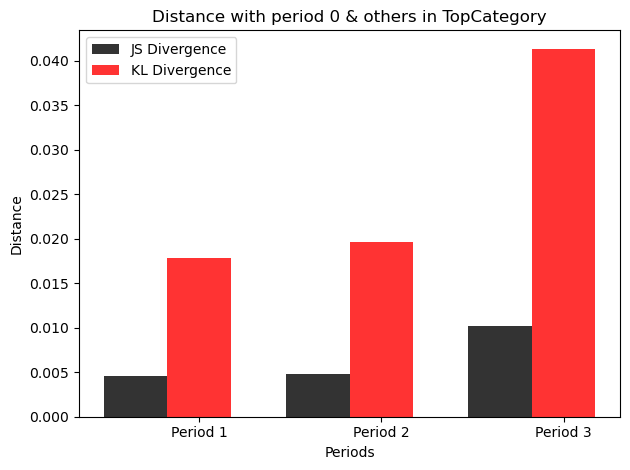

In [60]:
objects = ('Period 1', 'Period 2', 'Period 3')
y_pos = np.arange(len(objects))

div_tot_tg_JS = [JSD_p1, JSD_p2, JSD_p3]
div_tot_tg_KL = [KLD_p1, KLD_p2, KLD_p3]

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(y_pos, div_tot_tg_JS, bar_width,
alpha=opacity,
color='black',
label='JS Divergence')

rects2 = plt.bar(y_pos + bar_width, div_tot_tg_KL, bar_width,
alpha=opacity,
color='r',
label='KL Divergence')

plt.xlabel('Periods')
plt.ylabel('Distance')
plt.title('Distance with period 0 & others in TopCategory')
plt.xticks(y_pos + bar_width, objects)
plt.legend()

plt.tight_layout()
plt.show()

On peut voir dans ce diagramme que les données **`Top Category ont changé par rapport à la période 0`**, en particulier en période 3.

* A présent, étudions la dérive des **données quantitatives** :

On va commencer par récupérer les données de **formation en entrée** (période 0) dans la variable **`x_train`**, les données de **formation en sortie** (période 1 à 3), dans les variables **`x_test_pN`**, N = 1, 2 ou 3.

In [61]:
to_drop = ["TopCategory","TotalCart"]

x_train   = period_0.drop(columns = to_drop)

x_test_p1 = period_1.drop(columns = to_drop)
x_test_p2 = period_2.drop(columns = to_drop)
x_test_p3 = period_3.drop(columns = to_drop)

A présent, on peut calculer la distance de Wasserstein que l'on va stocker dans le tableau : 

* **`WD_P0_PN`** : tableau contenant les distances de Wasserstein de la période 0 par à rapport à la période N.  

In [62]:
WD_P0_P1 = np.arange(8, dtype = float)
WD_P0_P2 = np.arange(8, dtype = float)
WD_P0_P3 = np.arange(8, dtype = float)

p = 2

for i, col in enumerate(x_train):
    
    WD_P0_P1[i] = WassersteinDistance(np.array(x_train[col]), np.array(x_test_p1[col]),p)
    WD_P0_P2[i] = WassersteinDistance(np.array(x_train[col]), np.array(x_test_p2[col]),p)
    WD_P0_P3[i] = WassersteinDistance(np.array(x_train[col]), np.array(x_test_p3[col]),p)

Encore une fois, nous allons visualiser ces données via un **diagramme en bâton**.

Cette fois-ci nous allons placer les **variables en abscisse**, la **distance de Wasserstein par rapport à la période 0 en ordonnée**, et dessiner trois bâtons, l'un correspondant à la distance par rapport à la période 1, la période 2 et à la période 3.

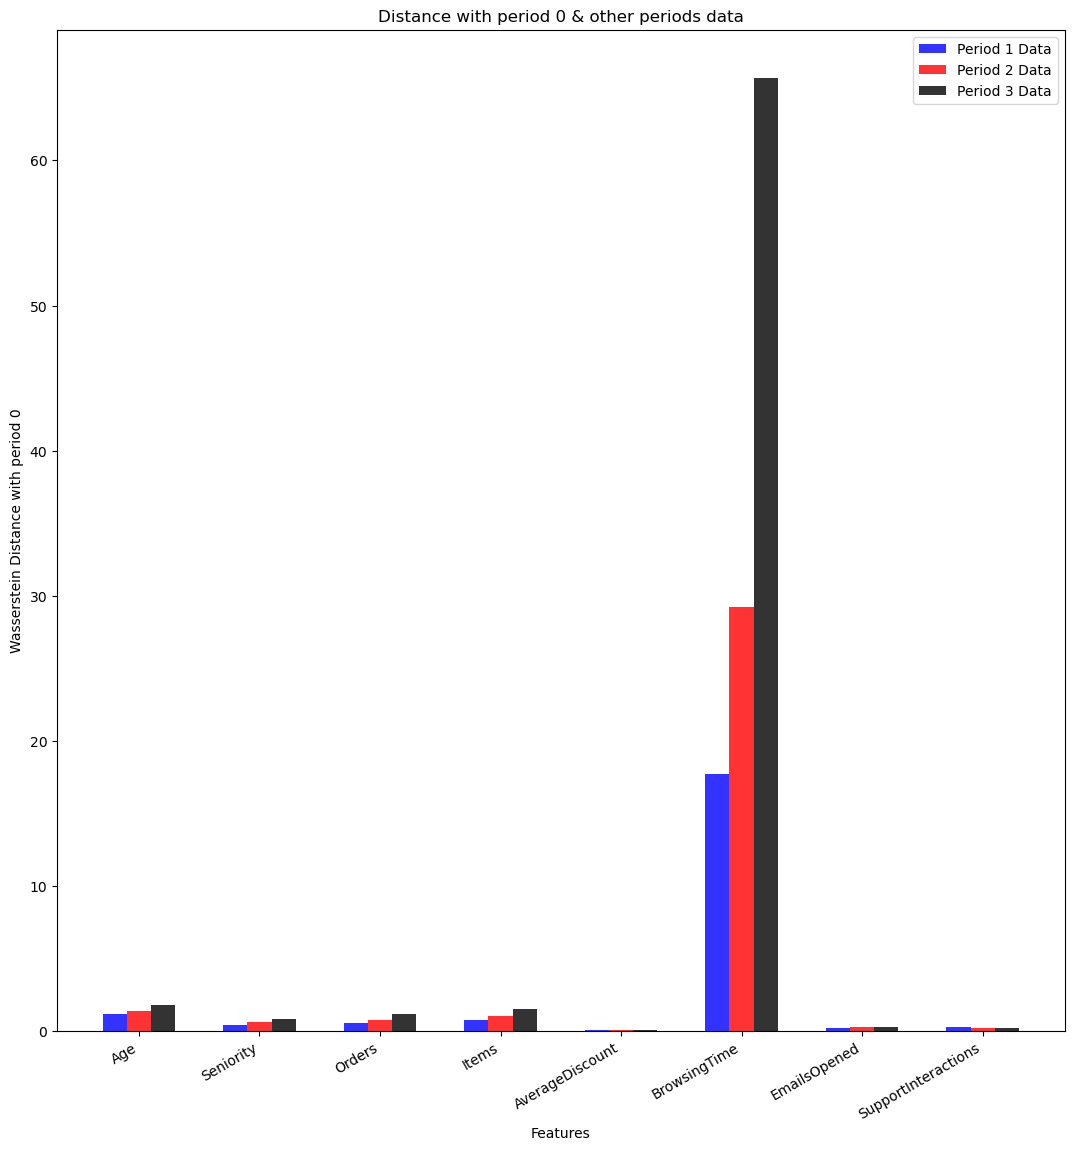

In [63]:
objects = ('Age', 'Seniority', 'Orders','Items', 'AverageDiscount', 'BrowsingTime','EmailsOpened','SupportInteractions')

y_pos = np.arange(len(objects))

fig, ax = plt.subplots(figsize=(13, 13))
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(y_pos, WD_P0_P1, bar_width,
alpha=opacity,
color='b',
label='Period 1 Data')

rects2 = plt.bar(y_pos + bar_width, WD_P0_P2, bar_width,
alpha=opacity,
color='r',
label='Period 2 Data')

rects3 = plt.bar(y_pos + 2*bar_width, WD_P0_P3, bar_width,
alpha=opacity,
color='black',
label='Period 3 Data')

plt.xlabel('Features')
plt.ylabel('Wasserstein Distance with period 0')
plt.title('Distance with period 0 & other periods data')
plt.xticks(y_pos + bar_width, objects,rotation=30, ha='right')
plt.legend()

plt.show()

La variable qui présenté le plus de changement est le **`BrowsingTime`** et la période la plus changeante est encore une fois la **période 3**, suivie par la période 2.

Maintenant que l'on sait quelle est la variable explicative et la période qui a le plus changé, voyons l'impact que ces changements ont eu sur la variable à expliquer; **`TotalCart`**.

## Partie 2 : 

Je vais commencer par calculer la distance de Wasserstein de la période 0 par rapport aux périodes 1, 2 et 3 en **`TotalCart`**. 
Je vais ranger ces valeurs dans le tableau **div_TotalCart**.

In [64]:
div_TotalCart = [WassersteinDistance(np.array(period_0["TotalCart"]),np.array(period_1["TotalCart"]),2),
                 WassersteinDistance(np.array(period_0["TotalCart"]),np.array(period_2["TotalCart"]),2),
                 WassersteinDistance(np.array(period_0["TotalCart"]),np.array(period_3["TotalCart"]),2)]

Je vais à présent calculer la distance de Wasserstein pour les données prédites pour la période N, variable **y_pred_pN**, par rapport aux valeurs réelles respectives, et ranger ces valeurs dans le tableau **div_TotalCart_pred**.

In [65]:
div_TotalCart_pred = [WassersteinDistance(y_pred_p1,np.array(period_1["TotalCart"]),2),
                      WassersteinDistance(y_pred_p2,np.array(period_2["TotalCart"]),2),
                      WassersteinDistance(y_pred_p3,np.array(period_3["TotalCart"]),2)]

Les données prêtes, nous allons les visualiser via un **diagramme en bâton** avec les **périodes en abscisse**, **la distance en ordonnée** et dessiner deux bâtons : un pour la **distance par rapport aux données prédites** et l'autre pour **la distance par rapport aux données de la période 0**. 

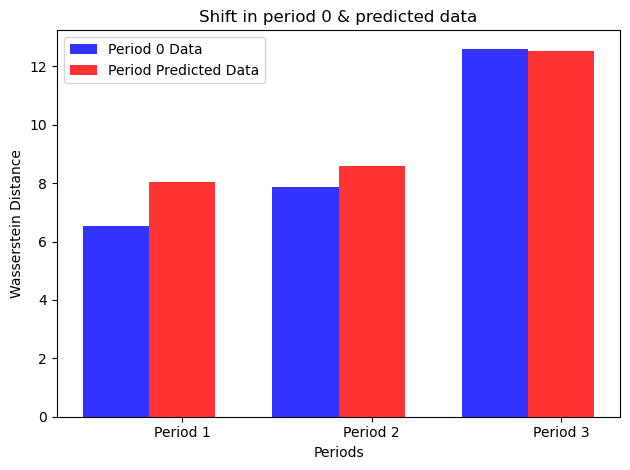

In [66]:
objects = ('Period 1', 'Period 2', 'Period 3')
y_pos = np.arange(len(objects))

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(y_pos, div_TotalCart, bar_width,
alpha=opacity,
color='b',
label='Period 0 Data')

rects2 = plt.bar(y_pos + bar_width, div_TotalCart_pred, bar_width,
alpha=opacity,
color='r',
label='Period Predicted Data')

plt.xlabel('Periods')
plt.ylabel('Wasserstein Distance')
plt.title('Shift in period 0 & predicted data')
plt.xticks(y_pos + bar_width, objects)
plt.legend()

plt.tight_layout()
plt.show()

Ce diagramme montre assez clairement que la variable **`TotalCart`** a changé,en particulier à la période 3, encore une fois. Les variables explicatives ont vraisemblablement une influence sur elles. 
Les données prédites sont aussi distantes des données qu'elles sont censées prédire.
On remarque aussi que **la dérive des données prédites par rapport aux données à prédire** est **proportionelle** à la **dérive de les périodes 1, 2 et 3 par rapport à la période 0**. 

## Conclusion : 

Nous avons vu dans que les **données explicatives ont beaucoup changé vis à vis de la période 0**, et ce surtout en période 3, **de même pour la variable à expliquer** qui est alors certainement corrêlé à ces variables. On a aussi vu que **la dérive des données prédites est proportionelle** à celle des données d'entraînements, du moins, en l'occurence .

Ce qui nous permet de conclure que le modèle **doit en effet être mis à jour**. Néanmoins, mettre à jour modèle est une opération qui peut s'avérer couteuse, dans ce cas nous pouvons utiliser des algorithmes plus résistants à la dérive comme le **Random Forest**. 